# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.1.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [7]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [8]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

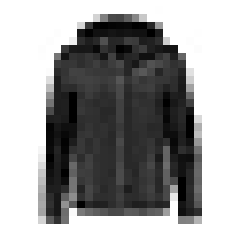

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [13]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

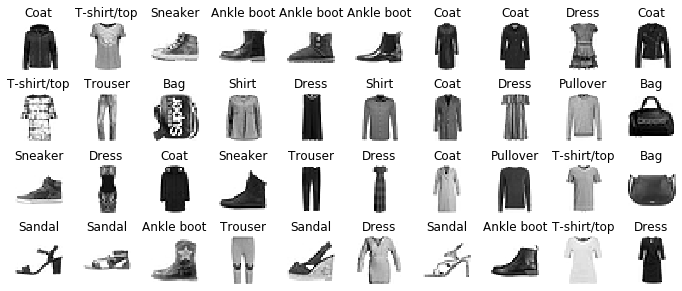

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[ 0.00290351,  0.05741093,  0.05909473, ..., -0.01621252,
        -0.02576407, -0.04767506],
       [-0.00629289,  0.04663119,  0.01180778, ..., -0.01155263,
         0.02364795,  0.02793813],
       [-0.03031524,  0.00749741,  0.04913435, ..., -0.01556965,
        -0.03069037, -0.00728951],
       ...,
       [ 0.03784373,  0.01896499,  0.06259419, ...,  0.03297378,
        -0.05272627,  0.03889252],
       [ 0.00261343, -0.0089236 ,  0.01802199, ...,  0.04833872,
        -0.06217077, -0.03868649],
       [-0.01036055, -0.07369399, -0.01652423, ...,  0.04903881,
         0.02830631,  0.06279892]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [33]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 191us/sample - loss: 0.7156 - accuracy: 0.7646 - val_loss: 0.5106 - val_accuracy: 0.8286
Epoch 2/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.4877 - accuracy: 0.8296 - val_loss: 0.4458 - val_accuracy: 0.8510
Epoch 3/30
55000/55000 [==============================] - 8s 149us/sample - loss: 0.4440 - accuracy: 0.8441 - val_loss: 0.4157 - val_accuracy: 0.8582
Epoch 4/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.4162 - accuracy: 0.8541 - val_loss: 0.4129 - val_accuracy: 0.8540
Epoch 5/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3964 - accuracy: 0.8613 - val_loss: 0.3809 - val_accuracy: 0.8648
Epoch 6/30
55000/55000 [==============================] - 8s 151us/sample - loss: 0.3807 - accuracy: 0.8662 - val_loss: 0.3732 - val_accuracy: 0.8752
Epoch 7/30
55000/55000 [==========================

In [34]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

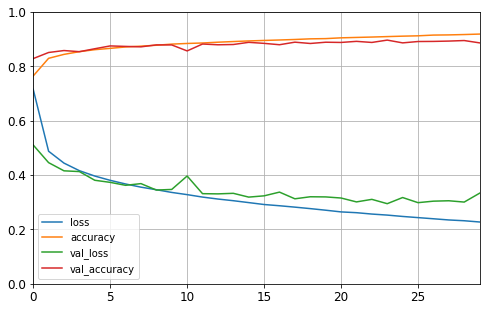

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.3605 - accuracy: 0.8730


[0.3604803295016289, 0.873]

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

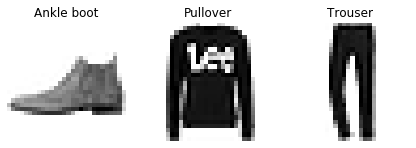

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) repeat with more layers
#### 5) apply on different datasets

# CORRECTION

# 1) Different optimizers


# 1.1)Adadelta

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adadelta",
              metrics=["accuracy"])

In [45]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 188us/sample - loss: 0.2117 - accuracy: 0.9256 - val_loss: 0.2880 - val_accuracy: 0.8974
Epoch 2/30
55000/55000 [==============================] - 10s 181us/sample - loss: 0.2050 - accuracy: 0.9287 - val_loss: 0.2868 - val_accuracy: 0.8972
Epoch 3/30
55000/55000 [==============================] - 10s 185us/sample - loss: 0.2037 - accuracy: 0.9292 - val_loss: 0.2867 - val_accuracy: 0.8970
Epoch 4/30
55000/55000 [==============================] - 10s 175us/sample - loss: 0.2028 - accuracy: 0.9295 - val_loss: 0.2866 - val_accuracy: 0.8964
Epoch 5/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.2022 - accuracy: 0.9293 - val_loss: 0.2862 - val_accuracy: 0.8976
Epoch 6/30
55000/55000 [==============================] - 9s 161us/sample - loss: 0.2017 - accuracy: 0.9295 - val_loss: 0.2861 - val_accuracy: 0.8984
Epoch 7/30
55000/55000 [=======================

In [46]:
history1.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

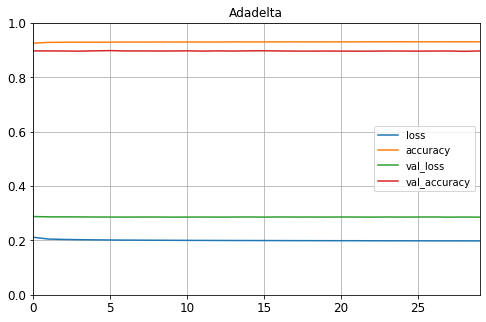

In [47]:
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('Adadelta'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
Adadelta = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3145 - accuracy: 0.8914


In [50]:
Adadelta

[0.3144932017028332, 0.8914]

# 1.2)Adamax

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adamax",
              metrics=["accuracy"])

In [52]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 179us/sample - loss: 0.2740 - accuracy: 0.9000 - val_loss: 0.3230 - val_accuracy: 0.8842
Epoch 2/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.2576 - accuracy: 0.9045 - val_loss: 0.3190 - val_accuracy: 0.8858
Epoch 3/30
55000/55000 [==============================] - 10s 180us/sample - loss: 0.2487 - accuracy: 0.9085 - val_loss: 0.3026 - val_accuracy: 0.8898
Epoch 4/30
55000/55000 [==============================] - 8s 143us/sample - loss: 0.2334 - accuracy: 0.9149 - val_loss: 0.3354 - val_accuracy: 0.8834
Epoch 5/30
55000/55000 [==============================] - 9s 169us/sample - loss: 0.2258 - accuracy: 0.9177 - val_loss: 0.2943 - val_accuracy: 0.8904
Epoch 6/30
55000/55000 [==============================] - 11s 197us/sample - loss: 0.2173 - accuracy: 0.9201 - val_loss: 0.2895 - val_accuracy: 0.8952
Epoch 7/30
55000/55000 [========================

In [53]:
history2.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

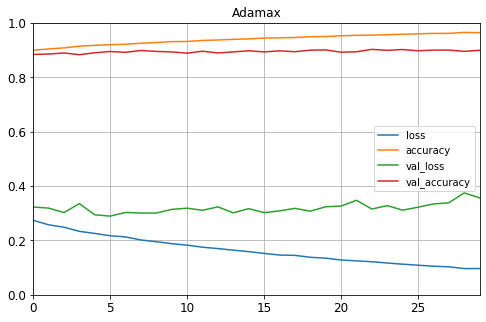

In [55]:
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Adamax'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
Adamax = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3859 - accuracy: 0.8979


In [57]:
Adamax

[0.38586313135623934, 0.8979]

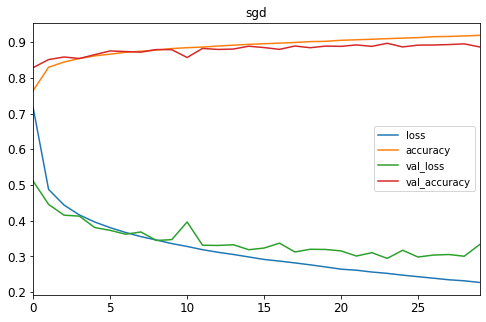

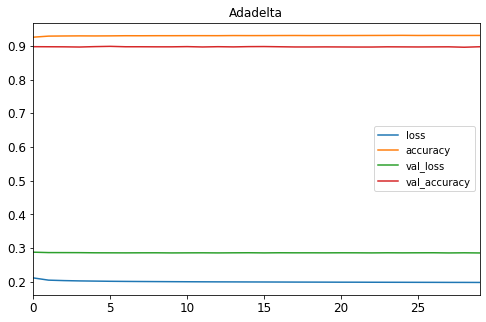

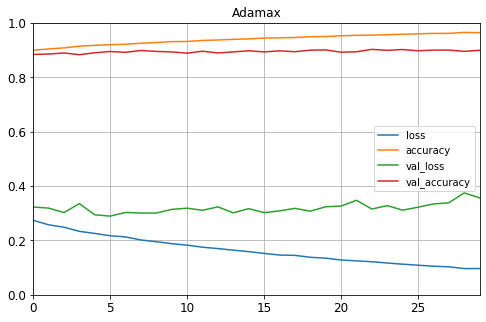

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5),title=('sgd'))
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('Adadelta'))
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Adamax'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 2)Using different batch size

In [60]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [61]:
history4 = model.fit(X_train, y_train, batch_size=2, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 101s 2ms/sample - loss: 0.3295 - accuracy: 0.8790 - val_loss: 0.3780 - val_accuracy: 0.8630
Epoch 2/30
55000/55000 [==============================] - 94s 2ms/sample - loss: 0.2543 - accuracy: 0.9047 - val_loss: 0.3252 - val_accuracy: 0.8854
Epoch 3/30
55000/55000 [==============================] - 96s 2ms/sample - loss: 0.2360 - accuracy: 0.9125 - val_loss: 0.3261 - val_accuracy: 0.8864
Epoch 4/30
55000/55000 [==============================] - 94s 2ms/sample - loss: 0.2162 - accuracy: 0.9183 - val_loss: 0.3579 - val_accuracy: 0.8796
Epoch 5/30
55000/55000 [==============================] - 84s 2ms/sample - loss: 0.2049 - accuracy: 0.9224 - val_loss: 0.3128 - val_accuracy: 0.8948
Epoch 6/30
55000/55000 [==============================] - 91s 2ms/sample - loss: 0.1953 - accuracy: 0.9250 - val_loss: 0.3575 - val_accuracy: 0.8898
Epoch 7/30
55000/55000 [==============================] 

In [62]:
model_batch_2 = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 157us/sample - loss: 0.5871 - accuracy: 0.8791


In [64]:
model_batch_2

[0.587073185005784, 0.8791]

In [66]:
history5 = model.fit(X_train, y_train, batch_size=1000, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.0948 - accuracy: 0.9648 - val_loss: 0.4701 - val_accuracy: 0.8982
Epoch 2/30
55000/55000 [==============================] - 2s 38us/sample - loss: 0.0733 - accuracy: 0.9724 - val_loss: 0.4547 - val_accuracy: 0.9012
Epoch 3/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.0662 - accuracy: 0.9757 - val_loss: 0.4474 - val_accuracy: 0.9036
Epoch 4/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.0622 - accuracy: 0.9772 - val_loss: 0.4429 - val_accuracy: 0.9030
Epoch 5/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.0594 - accuracy: 0.9783 - val_loss: 0.4401 - val_accuracy: 0.9036
Epoch 6/30
55000/55000 [==============================] - 2s 38us/sample - loss: 0.0574 - accuracy: 0.9793 - val_loss: 0.4379 - val_accuracy: 0.9056
Epoch 7/30
55000/55000 [==============================] -

In [67]:
model_batch_10000 = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.4945 - accuracy: 0.9012


In [68]:
model_batch_10000

[0.4944980951040983, 0.9012]

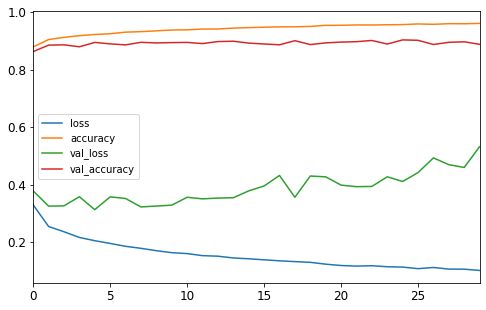

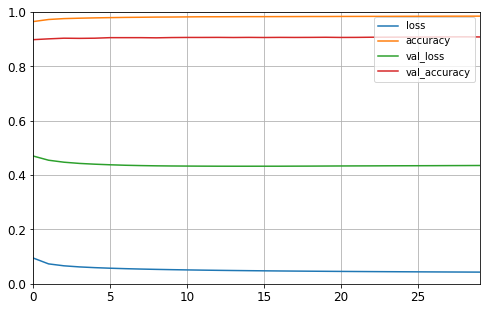

In [70]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 3) Using different number of epochs

# 3.1) Number of epochs=10

In [71]:
history6 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 152us/sample - loss: 0.0429 - accuracy: 0.9844 - val_loss: 0.4426 - val_accuracy: 0.9094
Epoch 2/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.0399 - accuracy: 0.9857 - val_loss: 0.4422 - val_accuracy: 0.9084
Epoch 3/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.0380 - accuracy: 0.9867 - val_loss: 0.4546 - val_accuracy: 0.9104
Epoch 4/10
55000/55000 [==============================] - 8s 154us/sample - loss: 0.0365 - accuracy: 0.9872 - val_loss: 0.4556 - val_accuracy: 0.9086
Epoch 5/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.0353 - accuracy: 0.9877 - val_loss: 0.4602 - val_accuracy: 0.9084
Epoch 6/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.0342 - accuracy: 0.9880 - val_loss: 0.4638 - val_accuracy: 0.9092
Epoch 7/10
55000/55000 [===========================

In [72]:
mod_epochs_10 = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.5479 - accuracy: 0.9010


# 3.2) Number of epochs=40

In [73]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 8s 146us/sample - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.4863 - val_accuracy: 0.9082
Epoch 2/40
55000/55000 [==============================] - 8s 144us/sample - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.4839 - val_accuracy: 0.9088
Epoch 3/40
55000/55000 [==============================] - 9s 160us/sample - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.4847 - val_accuracy: 0.9086
Epoch 4/40
55000/55000 [==============================] - 7s 131us/sample - loss: 0.0282 - accuracy: 0.9903 - val_loss: 0.4958 - val_accuracy: 0.9084
Epoch 5/40
55000/55000 [==============================] - 7s 134us/sample - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.4959 - val_accuracy: 0.9074
Epoch 6/40
55000/55000 [==============================] - 8s 151us/sample - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.4999 - val_accuracy: 0.9082
Epoch 7/40
55000/55000 [===========================

In [74]:
mod_epochs_40 = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.6839 - accuracy: 0.9002


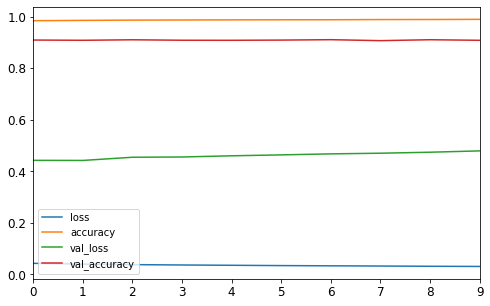

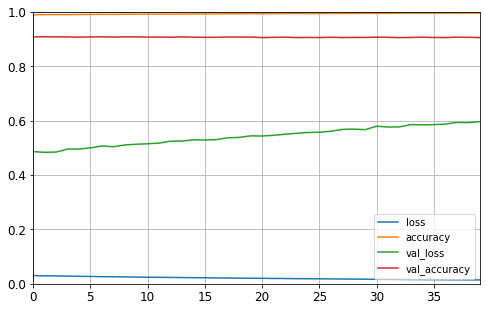

In [75]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4) Using more layers

In [76]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))



In [77]:
model.layers

In [78]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [79]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 15s 265us/sample - loss: 1.0768 - accuracy: 0.6096 - val_loss: 0.5907 - val_accuracy: 0.7928
Epoch 2/30
55000/55000 [==============================] - 12s 220us/sample - loss: 0.7168 - accuracy: 0.7413 - val_loss: 0.4966 - val_accuracy: 0.8288
Epoch 3/30
55000/55000 [==============================] - 12s 216us/sample - loss: 0.6282 - accuracy: 0.7736 - val_loss: 0.4649 - val_accuracy: 0.8318
Epoch 4/30
55000/55000 [==============================] - 10s 174us/sample - loss: 0.5802 - accuracy: 0.7921 - val_loss: 0.4281 - val_accuracy: 0.8498
Epoch 5/30
55000/55000 [==============================] - 8s 146us/sample - loss: 0.5442 - accuracy: 0.8075 - val_loss: 0.4025 - val_accuracy: 0.8596
Epoch 6/30
55000/55000 [==============================] - 9s 168us/sample - loss: 0.5210 - accuracy: 0.8146 - val_loss: 0.4001 - val_accuracy: 0.8558
Epoch 7/30
55000/55000 [=======================

In [80]:
model = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 155us/sample - loss: 0.3538 - accuracy: 0.8750


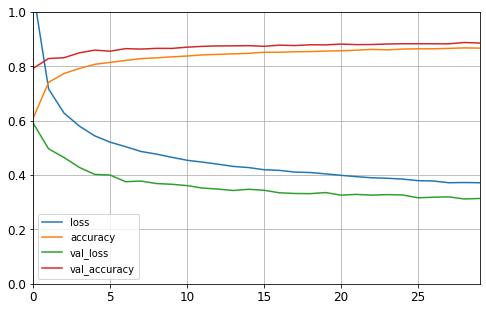

In [81]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5) apply on different datasets